# Decision trees

Welcome to the first jupyter notebook! In this session, we won't go into too many minute details yet, but will cover the basics of machine learning. We've tried to keep it as simple as possible, also because many might only have little experience with python and/or programming a 'learning machine'. If it looks like you're gonna be through the content of this notebook in ten minutes or so, because you're already familiar with all of its concepts, then feel free to challenge yourself a little more with the overarching machine-learning challenge.

## Setup

To allow the next code blocks to run smoothly, this section sets a couple of settings.

Some imports that we will be using:

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

Set the random seed to a fixed number. This will guarantee that the notebook output is generated the same way for every run, otherwise the seed would be – random, as the name suggests.

In [2]:
np.random.seed(42)

Some figure plotting settings: increase the axis labels of our figures a bit.

In [3]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Before we start, we'll define the following function to show decision boundaries in our plots. Ignore the details of this implementation ...

In [4]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5]):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^")
    plt.axis(axes)
    plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

## Classification trees

Let's start with an easy classification problem and see what can be done about it with decision trees. The first step is to generate some random data. The Scikit Learn package provides a couple of functions for these, so we won't have to worry about it ourselves. The function used is [make_moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html). Run the following cell to import the function and generate 100 samples of two classes in half-moon shape.

In [5]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=53)

We can examine the structure of our data as we did in the previous notebook:

In [6]:
X[0:3]

array([[ 0.20706864,  0.98150398],
       [ 1.16289446,  0.01844799],
       [ 0.1426683 , -0.1109168 ]])

Remember: this command outputs the feature vectors of the first three instances. From what we can tell above, every of these instances has two features (the square brackets mark the beginning/the end of an entry in the overarching vector). Let's also have a look at the target values:

In [7]:
y[0:3]

array([0, 1, 1])

Look's like a typical classification problem: our entries are either 0's, meaning that this instance belongs to "class 0", or 1's for instances of "class 1". Since our dataset is reasonably small with only 100 instances, we should maybe just plot it to get an idea what we're talking about (ignore the details of these plotting commands):

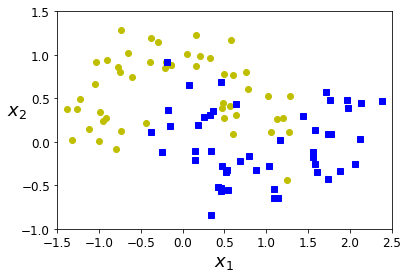

In [8]:
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.axis([-1.5, 2.5, -1, 1.5])
plt.xlabel(r"$x_1$", fontsize=18)
plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
plt.show()

Ok, this indeed looks like two half moons, or something like a yin-and-yang structure. If we used something like a linear regression, we would definitely not be able to fit this dataset very well, but maybe a decision tree could help us with that?

Let's define a decision tree! For that, we use the [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) class of Scikit Learn, that comes with lots of functionalities useful for us.

In [9]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

From the output, you can already see that the model comes with a bunch of parameters that we could have set by hand. Many of these have very resonable default values, such as `criterion='gini'`. Just a quick reminder of the Gini impurity index:

$$ G_i = 1 - \sum_{k=1}^n p_{i,k}^2 $$

for classes $k=1,\dots,n$ and leaf $i$ of a tree. We could also switch to using entropy as a measure when/where/how often to split the decision tree.

Before we discuss all of these parameters in a bit more detail, let's just use the "default" decision-tree classifier and see how well it performs:

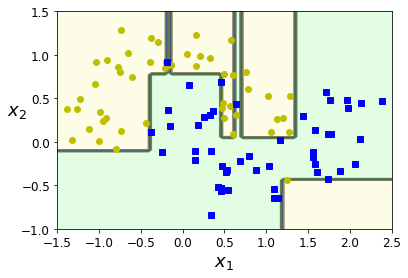

In [10]:
plot_decision_boundary(tree, X, y)
plt.show()

Hmm. The model seems to produce quite a few small "boxes" with only very few, sometimes even just one instance in it. Would you say this model looks particularly great? Would it generalise well on a new dataset generated from the same shape?

Maybe it would be useful to apply some sort of regularisation to the model. As we're extremely sensitive to outliers at the moment, maybe we could require a minimum number of instances for each leaf of the tree.

In [11]:
tree = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

Let's create the same plot as before:

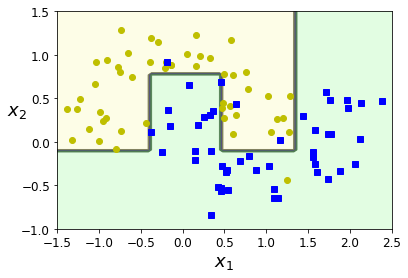

In [12]:
plot_decision_boundary(tree, X, y)
plt.show()

This definitely does look a lot better, doesn't it? There are a few outliers that the decision boundary doesn't catch, but probably – on a completely new dataset – this model would perform a lot better than the one above. We usually say: _it generalises well with unseen data_. There are many more regularisation parameters, feel free to try them out:
* Maximum number of features considered: in our case we only have two features anyways, but in many cases this makes sense.
* Maximum number of leaves in the entire tree.
* Minimum decrease of impurity (in our case, the Gini impurity) when moving from one level to the next.
* Minimum impurity value to still allow further splits.
* Minimum number of instances required for a split.
* ...

## Bagging trees

We've learnt about techniques to combine multiple decision trees into an _ensemble_ of models. Usually, this includes sampling instances from the total number of instances. Or in normal people's language: you make sure to not consider all, but just a _subset_ of datapoints when building each tree. This ensures a bit of variety in what the trees are sensitive to, what they focus on, etc. This might make them less powerful by themselves (we like to call them "weak learners"), but they combine into a "strong learner".

As a quick reminder, there are two common techniques to sample our data: bagging (bootstrap aggregation), which is sampling _with_ replacement, and pasting, which is sampling _without_ replacement. Quick example:

```
Total dataset: 
[0, 1, 2, 3, 4, 5, 6, 7, 8]

Bagging:
Subset 1: [0, 4, 7]
Subset 2: [2, 5, 7]
Subset 3: [1, 1, 6]
Not sampled: [3, 8]

Pasting:
Subset 1: [0, 4, 7]
Subset 2: [2, 5, 8]
Subset 3: [1, 3, 6]
Not sampled: []
```
Whereas pasting makes sure that all instances are sampled and each instance only occurs once in all subsets, bagging allows duplicates of the same instance in the subsets. On the other hand, some instances are not sampled at all. Usually, bagging results in a greater variety among the subsets, but also a larger bias. When combining them, however, the ensemble usually performs quite well.

Before we implement a bagging ensemble ourselves, we should make sure we can quantify how good a model actually is. For that, we should evaluate the model's performance on some test data it has never seen before. We've already generated the half-moon dataset above, but let's generate it again with a larger number of instances, and then use the Scikit Learn function [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split it into two subsets: one for training, one for testing. With no parameters provided, the function splits the dataset into 3/4 and 1/4 for training and testing, respectively.

In [13]:
from sklearn.model_selection import train_test_split
X, y = make_moons(n_samples=400, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Let's just test if it that splitting actually worked fine:

In [14]:
X_train.shape

(300, 2)

In [15]:
X_test.shape

(100, 2)

This looks good: 300 instances of train data, 100 instances of test data, and each of them have two entries. Now, let's quickly train a simple decision tree on the training dataset again:

In [16]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

Now, let's predict the target values for our test dataset:

In [17]:
y_pred = tree_clf.predict(X_test)

This we need to compare to the _true_ target values now:

In [18]:
for i in range (0, len(X_train)):
    if i > 5: break
    print("Predicted class: %s \t True class: %s" % (y_test[i], y_pred[i]))

Predicted class: 0 	 True class: 0
Predicted class: 0 	 True class: 0
Predicted class: 0 	 True class: 0
Predicted class: 1 	 True class: 1
Predicted class: 1 	 True class: 1
Predicted class: 1 	 True class: 1


Ok, we can do it like that, but of course there are automated ways to compare the two. Scikit Learn comes with a function to calculate the _accuracy score_, that is, the fraction of correctly predicted target values ([accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Let's try it out.

In [19]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.89


Ok, so we're correct in about 90% of the cases. Let's compare this to a bagging ensemble. We will be using the [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) of Scikit Learn.

In [20]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=42,
                                                        splitter='best'),
      

As you can see, this comes with a bunch of parameters, most importantly: `n_estimators`, the number of models in the ensemble, and `max_samples`, the maximum number of instances that is fed into the individual models. `bootstrap=True` enables bootstrap aggregation, otherwise we would be using pasting. Let's calculate the predicted target values for the bagging ensemble, too, and then have a look at the accuracy score:

In [21]:
y_pred = bag_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.92


Cool, looks better than before! To understand why, maybe we should just plot the two models overlaid with the training and the test data. The top row shows training data, the bottom row shows test data. What's your conclusion when looking at the plots? Which model probably has the higher accuracy score on the training data?

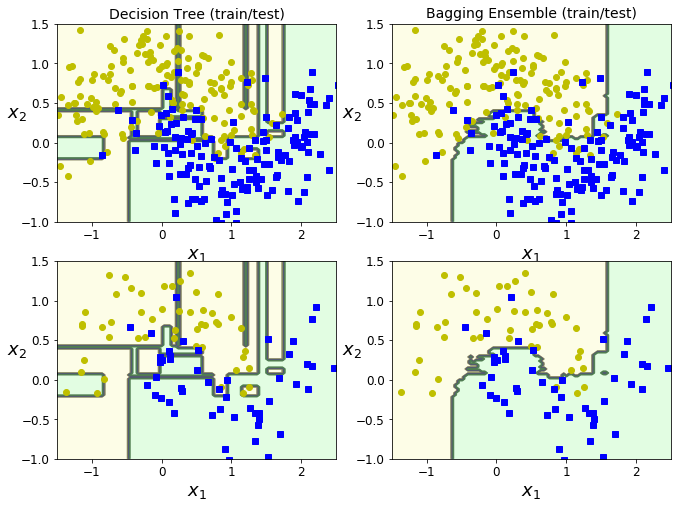

In [22]:
plt.figure(figsize=(11,8))
plt.subplot(221)
plot_decision_boundary(tree_clf, X_train, y_train)
plt.title("Decision Tree (train/test)", fontsize=14)
plt.subplot(222)
plot_decision_boundary(bag_clf, X_train, y_train)
plt.title("Bagging Ensemble (train/test)", fontsize=14)
plt.subplot(223)
plot_decision_boundary(tree_clf, X_test, y_test)
plt.subplot(224)
plot_decision_boundary(bag_clf, X_test, y_test)
plt.show()

## Adaptive boosting

As a last step, let's look at one of the two common boosting techniques: AdaBoost, or adaptive boosting. The idea behind the boosting is to start off with a model that performs reasonably well, but then iteratively build improved models that "correct" the mistakes done before. In the particular case of AdaBoost, this includes reweighting instances that were misclassified in the previous step. This makes the model in the next iteration step a lot more sensitive to these "difficult" instances, and they are quite likely to be predicted better. 

In case you're interested in the actual maths behind it, let me give a quick summary:
1. Calculate an error rate for the current model $j$. $w^{(i)}$ is the weight of instance $i$:

$$ r_j = \frac{\sum_{i=1}^{m} w^{(i)} ~ \text{with $\hat{y}^{(i)} \neq y^{(i)}$}}{\sum_{i=1}^{m} w^{(i)}}$$

2. Calculate a weight for the current model $j$ based on its error rate $r_j$ ($\eta$ is our usual learning rate):

$$ \alpha_j = \eta \log \frac{1 - r_j}{r_j} $$

3. Update the weights of the misclassified instances. If an instance was predicted correctly ($\hat{y}^{(i)} = y^{(i)}$), do not make any changes to the weight:

$$ w^{(i)} \leftarrow w^{(i)} \exp \alpha_j \quad \text{if} ~\hat{y}^{(i)} \neq y^{(i)} $$

Of course, at some point you'll stop building up the ensemble (maybe just based on a maximum number of models you'd like to have). Then, the prediction of the ensemble is calculated according to:

$$ \hat{y} = \text{argmax}_k \sum_{j=1}^N \alpha_j \quad \text{with} ~ \hat{y}_j = k $$

This means you'll still consider _all_ models of your ensemble in the prediction, but their "voting rights" are weighted according to their model weight $\alpha_j$, based on their error rates $r_j$. This ensures to "trust" those models more that generally perform better on the training data.

Let's try this on our half-moon dataset. We'll be using the [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) of Scikit Learn.

In [23]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    learning_rate=0.2, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

Now, let's make our predictions on the test data once again and calculate the accuracy score:

In [24]:
y_pred = ada_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.89


Interestingly, this number is lower than that of the bagging ensemble. Do you have any idea why? Let's also have a look at the decision boundaries once again.

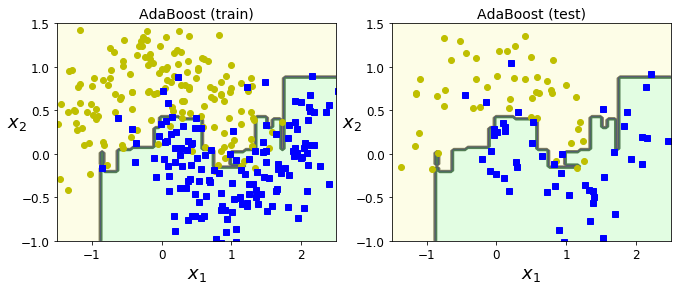

In [25]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title("AdaBoost (train)", fontsize=14)
plot_decision_boundary(ada_clf, X_train, y_train)
plt.subplot(122)
plt.title("AdaBoost (test)", fontsize=14)
plot_decision_boundary(ada_clf, X_test, y_test)